In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Chapter 4<br>Least Squares

## 4.1 Least Squares and the Normal Equations

In [2]:
def ls(A, b):
    return np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

In [3]:
def coef(x_i, y_i, degree):
    n = len(x_i)
    
    A = np.zeros((degree, n), dtype=x_i.dtype)
    for i in range(degree):
        A[i] = x_i**i
    A = A.T
    b = y_i
    
    return ls(A, b)

In [4]:
def fit(x_i, y_i, degree):
    c = coef(x_i, y_i, degree)

    def f(x):
        ans = 0
        for i in range(degree):
            ans += c[i] * (x**i)
        return ans
    
    return f

### Q. 1

In [5]:
# (a)
A = np.array([[3, -1, 2], [4, 1, 0], [-3, 2, 1], [1, 1, 5], [-2, 0, 3]])
b = np.array([10, 10, -5, 15, 0])

x = ls(A, b)
error = np.sqrt(sum((b - np.dot(A, x))**2))

print("x:", x)
print("2-norm error: %f" % error)

x: [2.5246085  0.66163311 2.09340045]
2-norm error: 2.413492


In [6]:
# (b)
A = np.array([[4, 2, 3, 0], [-2, 3, -1, 1], [1, 3, -4, 2], [1, 0, 1, -1], [3, 1, 3, -2]])
b = np.array([10, 0, 2, 0, 5])

x = ls(A, b)
error = np.sqrt(sum((b - np.dot(A, x))**2))

print("x:", x)
print("2-norm error: %f" % error)

x: [1.27389608 0.6885086  1.21244902 1.74968966]
2-norm error: 0.825640


### Q. 2

In [7]:
year = np.arange(1994, 2004, dtype=np.int64)
oil = np.array([67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777])
n = len(year)

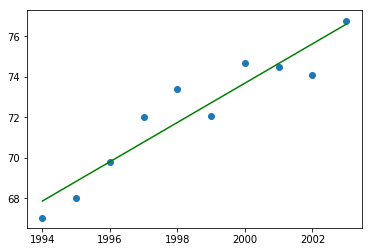

In [8]:
# (a)
f = fit(year, oil, 2) # line

x_range = np.linspace(1994, 2003, 1000)

plt.scatter(year, oil)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [9]:
error = np.sqrt(sum((oil - f(year))**2) / n)
estimate = f(2010)

print("RMSE: %f" % error)
print("Estimate in 2010: %f" % estimate)

RMSE: 0.976318
Estimate in 2010: 83.382273


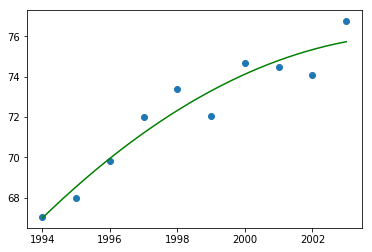

In [10]:
# (b)
f = fit(year, oil, 3) # Parabola

x_range = np.linspace(1994, 2003, 1000)

plt.scatter(year, oil)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [11]:
error = np.sqrt(sum((oil - f(year))**2) / n)
estimate = f(2010)

print("RMSE: %f" % error)
print("Estimate in 2010: %f" % estimate)

RMSE: 0.822680
Estimate in 2010: 74.409104


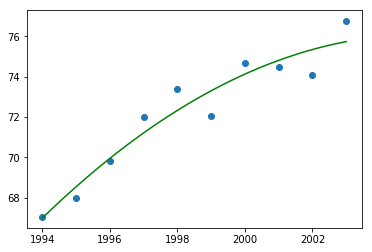

In [12]:
# (c)
f = fit(year, oil, 4) # Cubic curve

x_range = np.linspace(1994, 2003, 1000)

plt.scatter(year, oil)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [13]:
error = np.sqrt(sum((oil - f(year))**2) / n)
estimate = f(2010)

print("RMSE: %f" % error)
print("Estimate in 2010: %f" % estimate)

RMSE: 0.822687
Estimate in 2010: 74.416673


Paraboic estimation fits the best in terms of RMSE.

### Q. 3

In [14]:
year = np.array([1960, 1970, 1990, 2000], dtype=np.int64)
population = np.array([3039585530, 3707475887, 5281653820, 6079603571])
n = len(year)

pop_1980 = 4452584592

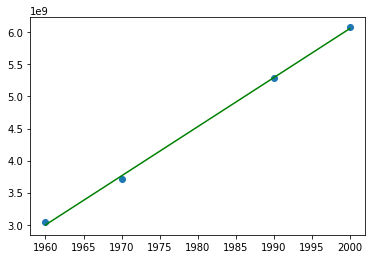

In [15]:
# (a)
f = fit(year, population, 2) # line

x_range = np.linspace(1960, 2000, 1000)

plt.scatter(year, population)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [16]:
error = np.sqrt(sum((population - f(year))**2) / n)
estimate = f(1980)

print("RMSE: %f" % error)
print("Estimate in 1980: %f" % estimate)
print("Error in 1980: %f" % (abs(pop_1980 - estimate)))

RMSE: 36751088.162408
Estimate in 1980: 4527079701.995331
Error in 1980: 74495109.995331


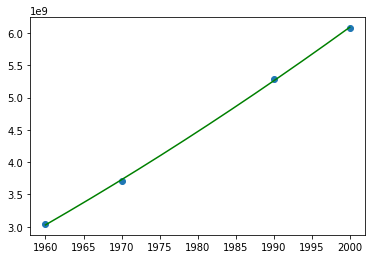

In [17]:
# (b)
f = fit(year, population, 3) # Parabol

x_range = np.linspace(1960, 2000, 1000)

plt.scatter(year, population)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [18]:
error = np.sqrt(sum((population - f(year))**2) / n)
estimate = f(1980)

print("RMSE: %f" % error)
print("Estimate in 1980: %f" % estimate)
print("Error in 1980: %f" % (abs(pop_1980 - estimate)))

RMSE: 17129714.190228
Estimate in 1980: 4472888594.651489
Error in 1980: 20304002.651489


Parabolic estimation provides better accuracy.

### Q. 4

In [19]:
# I think the question indicates the data of exercise 3.1.17.
year = np.array([1800, 1850, 1900, 2000], dtype=np.int64)
co2 = np.array([280, 283, 391, 370])
n = len(year)

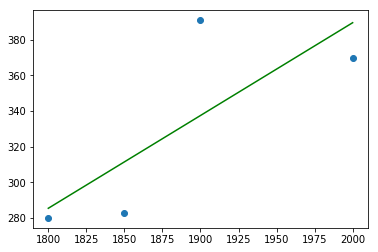

In [20]:
# (a)
f = fit(year, co2, 2) # line

x_range = np.linspace(1800, 2000, 1000)

plt.scatter(year, co2)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [21]:
error = np.sqrt(sum((co2 - f(year))**2) / n)
estimate = f(1950)

print("RMSE: %f" % error)
print("Estimate in 1950: %f" % estimate)

RMSE: 31.956891
Estimate in 1950: 363.571429


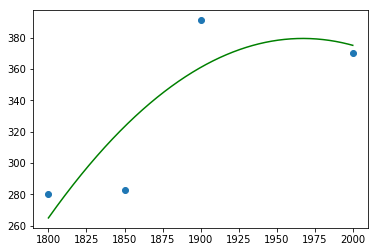

In [22]:
# (b)
f = fit(year, co2, 3) # Parabola

x_range = np.linspace(1800, 2000, 1000)

plt.scatter(year, co2)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [23]:
error = np.sqrt(sum((co2 - f(year))**2) / n)
estimate = f(1950)

print("RMSE: %f" % error)
print("Estimate in 1950: %f" % estimate)

RMSE: 26.315567
Estimate in 1950: 378.181818


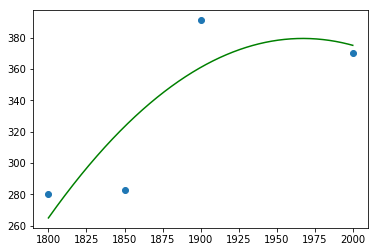

In [24]:
# (c)
f = fit(year, co2, 4) # Cubic curve

x_range = np.linspace(1800, 2000, 1000)

plt.scatter(year, co2)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [25]:
error = np.sqrt(sum((co2 - f(year))**2) / n)
estimate = f(1950)

print("RMSE: %f" % error)
print("Estimate in 1950: %f" % estimate)

RMSE: 26.315567
Estimate in 1950: 378.181818


### Q. 5

In [26]:
price = np.array([0.59, 0.80, 0.95, 0.45, 0.79, 0.99, 0.90, 0.65, 0.79, 0.69, 0.79, 0.49, 1.09, 0.95, 0.79, 0.65, 0.45, 0.60, 0.89, 0.79, 0.99, 0.85])
sales = np.array([3980, 2200, 1850, 6100, 2100, 1700, 2000, 4200, 2440, 3300, 2300, 6000, 1190, 1960, 2760, 4330, 6960, 4160, 1990, 2860, 1920, 2160])
n = len(price)

In [27]:
# (a)
c = coef(price, sales, 2) # line

print("S = %fP + %f" % (c[1], c[0]))
print("Normal equation: (A.T)*A*c = (A.T)*b")

S = -8314.364476P + 9510.099572
Normal equation: (A.T)*A*c = (A.T)*b


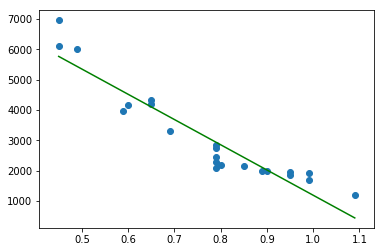

In [28]:
f = fit(price, sales, 2) # line

x_range = np.linspace(price.min(), price.max(), 1000)

plt.scatter(price, sales)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [29]:
error = np.sqrt(sum((sales - f(price))**2) / n)
print("RMSE: %f" % error)

RMSE: 518.305884


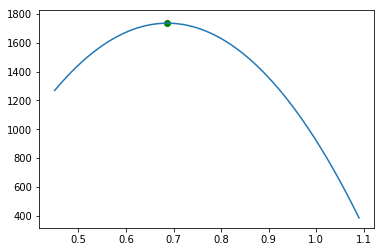

Best price: 0.686908
Maximum profit: 1735.746018


In [30]:
# (b)
# Total profit = S(P - 0.23) = (c[0] + c[1]P)(P - 0.23)
# => c[1](P - 0.23) + (c[0] + c[1]P) = 0
# => P = (0.23*c[1] - c[0])/(2*c[1])

P = (0.23 - c[0]/c[1])/2
profit = f(P)*(P - 0.23)

plt.plot(x_range, f(x_range)*(x_range - 0.23))
plt.scatter(P, profit, c='g')
plt.show()

print("Best price: %f" % P)
print("Maximum profit: %f" % profit)

### Q. 6

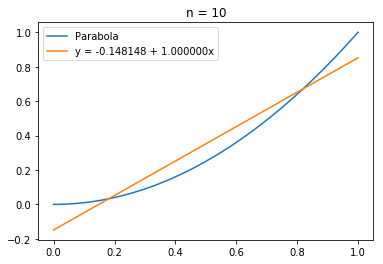

In [31]:
# (a)
n = 10
x_i = np.linspace(0, 1, n)

c = coef(x_i, x_i**2, 2)
f = fit(x_i, x_i**2, 2)

x_range = np.linspace(0, 1, 1000)

plt.plot(x_range, x_range**2, label="Parabola")
plt.plot(x_range, f(x_range), label="y = %f + %fx" % (c[0], c[1]))
plt.legend()
plt.title("n = %d" % n)

plt.show()

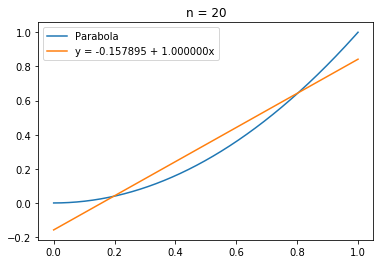

In [32]:
# (b)
n = 20
x_i = np.linspace(0, 1, n)

c = coef(x_i, x_i**2, 2)
f = fit(x_i, x_i**2, 2)

x_range = np.linspace(0, 1, 1000)

plt.plot(x_range, x_range**2, label="Parabola")
plt.plot(x_range, f(x_range), label="y = %f + %fx" % (c[0], c[1]))
plt.legend()
plt.title("n = %d" % n)

plt.show()

c_1 is a constant number of value 1, and c_0 tends to -1/6.

In [33]:
# (c)
# Put c_1 = -1/6 and c_2 = 1, by which F(c1, c2) attains its minimum value.
# F(c1, c2) calculates the mean-squared-error in terms of an integration for given linear function y = c1 + c2*x.

n = 10**5
x_i = np.linspace(0, 1, n)
error = sum((x_i**2 - f(x_i))**2) / n

print("MSE: %f" % error)
print("The minimum value of F(c1,c2): %f" % (1/180))

MSE: 0.005633
The minimum value of F(c1,c2): 0.005556


### Q. 7

In [34]:
x_i = np.linspace(-3, 3, 13)
y_i = np.zeros(13)
y_i[6] = 1
n = 13

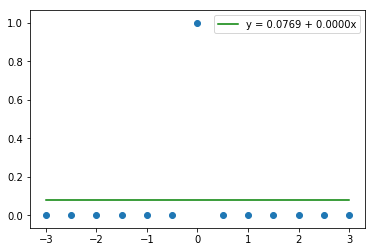

In [35]:
# (a)
c = coef(x_i, y_i, 2) # line
f = fit(x_i, y_i, 2)

x_range = np.linspace(-3, 3, 1000)

plt.scatter(x_i, y_i)
plt.plot(x_range, f(x_range), c='g', label="y = %.4f + %.4fx" % (c[0], c[1]))
plt.legend()
plt.show()

In [36]:
error = np.sqrt(sum((y_i - f(x_i))**2) / n)
print("RMSE: %f" % error)

RMSE: 0.266469


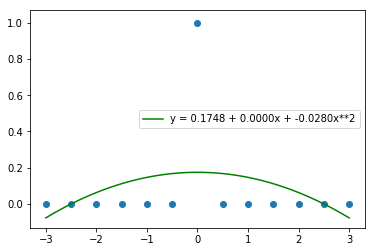

In [37]:
# (b)
c = coef(x_i, y_i, 3) # Parabola
f = fit(x_i, y_i, 3)

x_range = np.linspace(-3, 3, 1000)

plt.scatter(x_i, y_i)
plt.plot(x_range, f(x_range), c='g', label="y = %.4f + %.4fx + %.4fx**2" % (c[0], c[1], c[2]))
plt.legend()
plt.show()

In [38]:
error = np.sqrt(sum((y_i - f(x_i))**2) / n)
print("RMSE: %f" % error)

RMSE: 0.251942


### Q. 8

In [39]:
def A(n):
    hilbert = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            hilbert[i, j] = 1/(i+j+1)
    return hilbert[:, :n]

def c(n):
    return np.ones(n)

def b(n):
    return np.dot(A(n), c(n))

In [40]:
# (a)
n = 6
ans = ls(A(n), b(n))
print("Ans:", np.round(ans, 4))
print("Error:", np.round(c(n) - ans, 4))
print("Condition number: %g" % np.linalg.cond(A(n).T.dot(A(n))))

Ans: [1.0003 0.9993 1.0003 1.0002 0.9996 1.0001]
Error: [-0.0003  0.0007 -0.0003 -0.0002  0.0004 -0.0001]
Condition number: 6.00484e+12


In [41]:
# (b)
n = 8
ans = ls(A(n), b(n))
print("Ans:", np.round(ans, 4))
print("Error:", np.round(c(n) - ans, 4))
print("Condition number: %g" % np.linalg.cond(A(n).T.dot(A(n))))

Ans: [ 17.9172 -82.4377 151.756  -86.0919 -10.0644  24.8695   1.3728  -3.7132]
Error: [ -16.9172   83.4377 -150.756    87.0919   11.0644  -23.8695   -0.3728
    4.7132]
Condition number: 3.81982e+18


### Q. 9

In [42]:
x_i = np.linspace(2, 4, 11)

In [43]:
# (a)
d = 5

c = np.ones(d+1) # True value
A = np.zeros((d+1, 11))
y_i = np.zeros_like(x_i)
for i in range(d+1):
    y_i += x_i**i
    A[i] = x_i**i
A = A.T

ans = coef(x_i, y_i, d+1)
print("Ans:", ans)
print("Error:", c - ans)
print("Condition number: %g" % np.linalg.cond(A.T.dot(A)))

Ans: [1.00070383 0.99941765 1.00003424 1.00003694 0.99999537 1.00000003]
Error: [-7.03833415e-04  5.82354493e-04 -3.42440908e-05 -3.69377667e-05
  4.63420292e-06 -3.17859303e-08]
Condition number: 2.72427e+13


In [44]:
# (b)
d = 6

c = np.ones(d+1) # True value
A = np.zeros((d+1, 11))
y_i = np.zeros_like(x_i)
for i in range(d+1):
    y_i += x_i**i
    A[i] = x_i**i
A = A.T

ans = coef(x_i, y_i, d+1)
print("Ans:", ans)
print("Error:", c - ans)
print("Condition number: %g" % np.linalg.cond(A.T.dot(A)))

Ans: [0.1623305  1.62534039 0.88058878 0.98011266 1.00835583 0.99917589
 1.00004143]
Error: [ 8.37669495e-01 -6.25340389e-01  1.19411218e-01  1.98873435e-02
 -8.35583021e-03  8.24111630e-04 -4.14318001e-05]
Condition number: 2.53858e+16


In [45]:
# (c)
d = 8

c = np.ones(d+1) # True value
A = np.zeros((d+1, 11))
y_i = np.zeros_like(x_i)
for i in range(d+1):
    y_i += x_i**i
    A[i] = x_i**i
A = A.T

ans = coef(x_i, y_i, d+1)
print("Ans:", ans)
print("Error:", c - ans)
print("Condition number: %g" % np.linalg.cond(A.T.dot(A)))

Ans: [ 1.42830156e+05 -2.02866128e+04 -1.57564657e+04  3.98983010e+03
  1.67495704e+02 -2.16971947e+02  5.03519966e+01 -4.09293533e+00
  1.18848592e+00]
Error: [-1.42829156e+05  2.02876128e+04  1.57574657e+04 -3.98883010e+03
 -1.66495704e+02  2.17971947e+02 -4.93519966e+01  5.09293533e+00
 -1.88485922e-01]
Condition number: 1.41537e+19


### Q. 10

In [46]:
income = np.array([1.49, 3.03, 0.57, 5.74, 3.51, 3.73, 2.98, -0.18, 6.23, 3.38, 2.15, 2.10, 3.93, 2.47, -0.41])
vote = np.array([44.6, 57.8, 49.9, 61.3, 49.6, 61.8, 49.0, 44.7, 59.2, 53.9, 46.5, 54.7, 50.3, 51.2, 45.7])

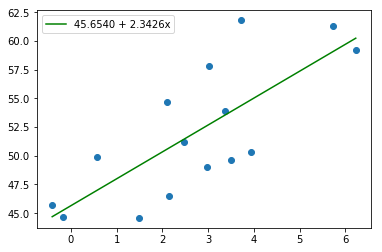

In [47]:
f = fit(income, vote, 2)
c = coef(income, vote, 2)

x_range = np.linspace(income.min(), income.max(), 1000)

plt.scatter(income, vote)
plt.plot(x_range, f(x_range), c='g', label="%.4f + %.4fx" % (c[0], c[1]))
plt.legend()
plt.show()

Incumbent party may expect 2.34% points of additional vote as personal income increases 1%.